## Here we use SVD to comprese image to it's smallest part

In [6]:
# code source : https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/2-linear-algebra-ii.ipynb#scrollTo=lBQnc4uGj3ZE

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

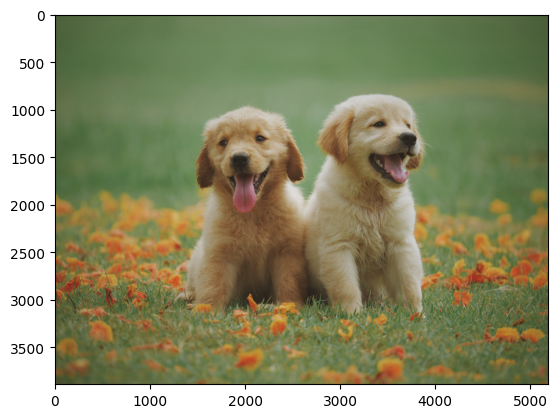

In [7]:
img = Image.open('_NiceDogs.jpg')
_ = plt.imshow(img)

# website for free pics: https://www.pexels.com/search/dog%20and%20cat/

SO here is some free and nice photos for us to use ^_^

SO we convert image to grayscale then it will be easier to compress image we don't have to deal with color complexity of rgb

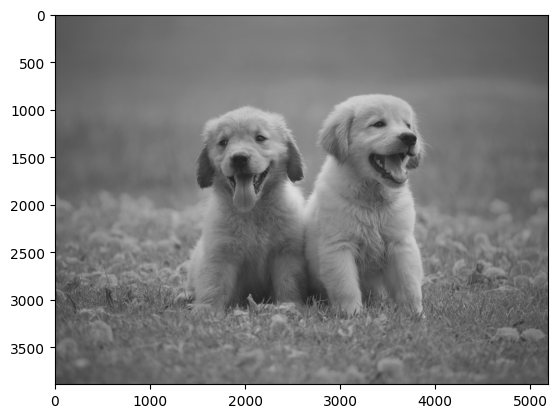

In [8]:
imggray = img.convert('LA')
_=plt.imshow(imggray)

Converting data into numpy matrix, and it does not effect image data as well:

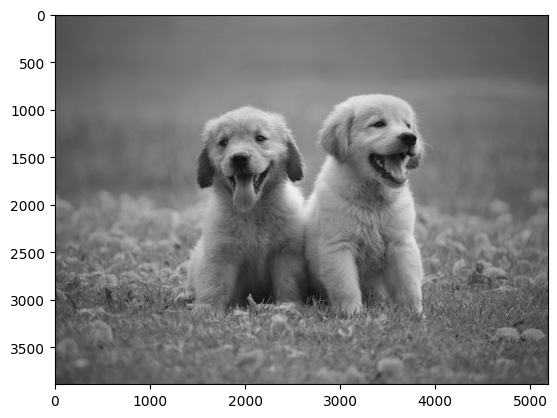

In [9]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_=plt.imshow(imgmat, cmap='gray')

Claculating SVD of the image:

In [10]:
U, D, V = np.linalg.svd(imgmat)

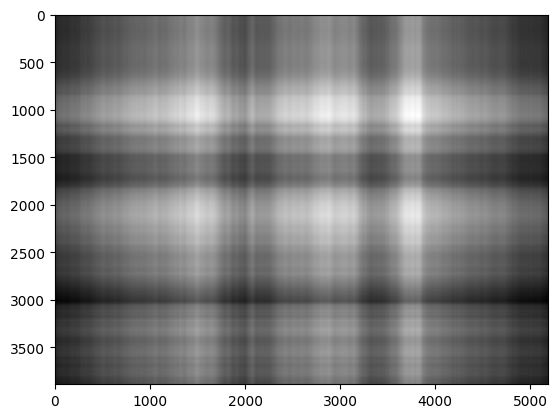

In [18]:
reconstimg = np.matrix(U[:, :1]) * np.diag(D[:1]) * np.matrix(V[:1, :])
_=plt.imshow(reconstimg, cmap='gray')

So here is nice function for us to play araound with 

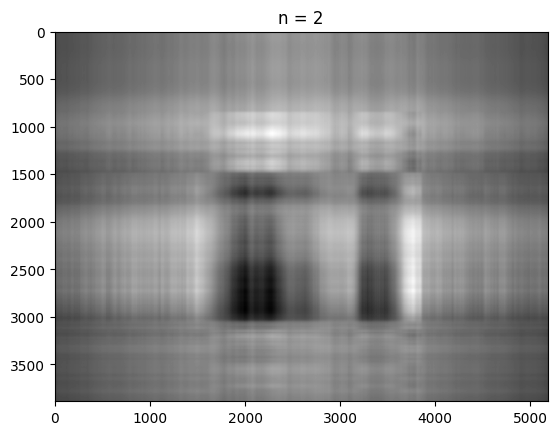

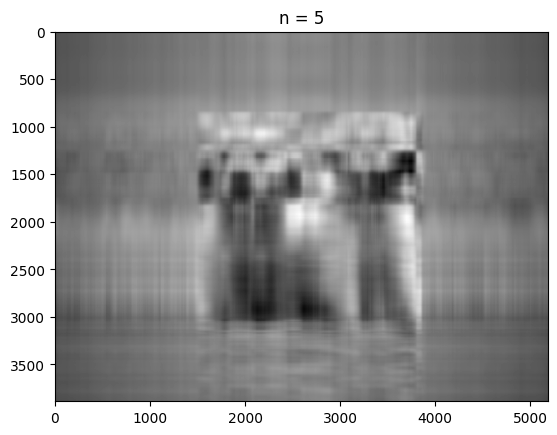

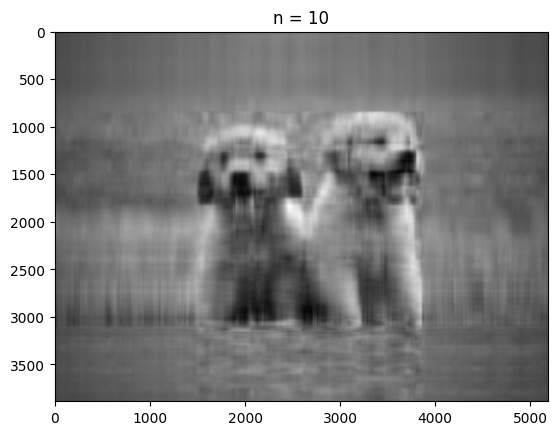

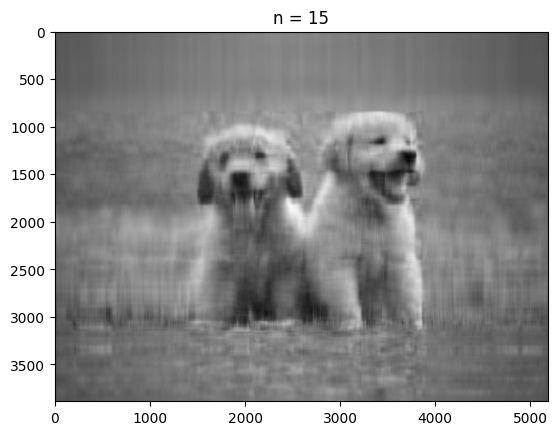

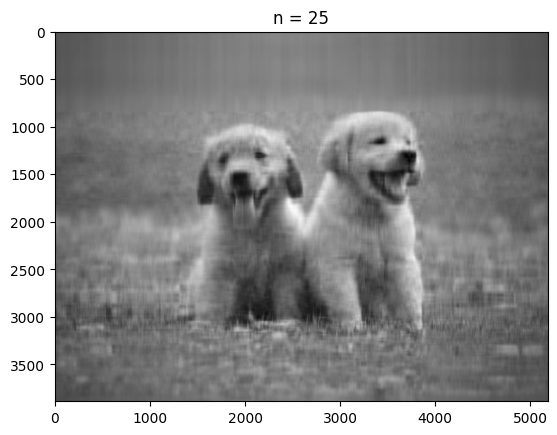

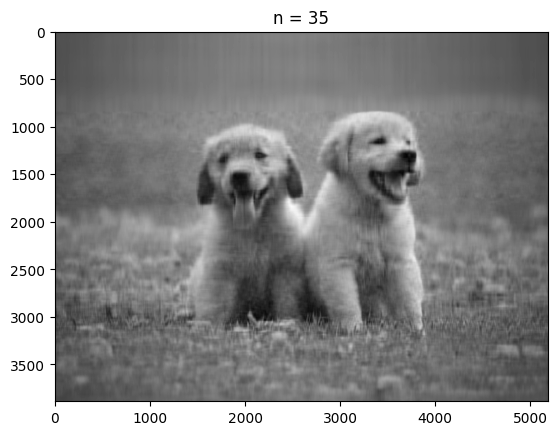

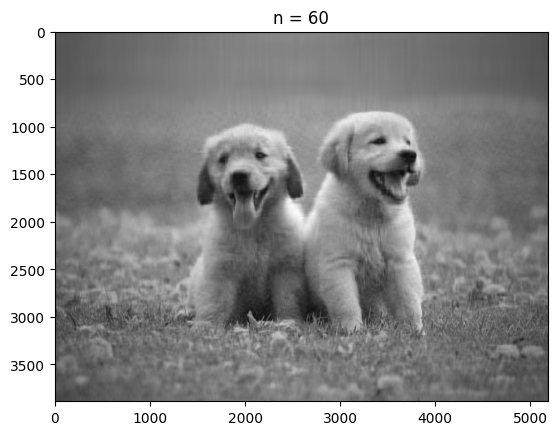

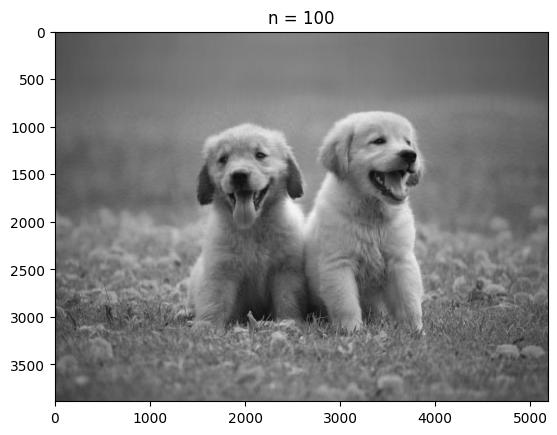

In [20]:
for i in [2, 5, 10, 15, 25, 35, 60, 100]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [21]:
imgmat.shape

(3888, 5184)

In [22]:
full_representation = 3888*5184
full_representation

20155392

In [23]:
svd60_rep = 60*3888 + 60 + 60*5184
svd60_rep

544380

In [24]:
svd60_rep/full_representation

0.027009149710409998

So this image as 60 singular vectors is 2.7% of the size of oroginal! 